<a href="https://colab.research.google.com/github/linsleymichira/Portfolio-Project-1/blob/main/JD_Finish_Line_Associate_People_Business_Intelligence_Analyst_Interview_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JD Finish Line Associate People Business Intelligence Analyst Interview Project

## Setup

### Import Libraries

In [ ]:
# install the missing module
!pip install ydata_profiling

# for data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# for linear algebra
import numpy as np

# for initial data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for Exploratory Data Analysis (EDA)
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=97a3cf868c4465a917efba0ecc8bc0bd275286c77e5770308d30e2d0a3a4c2ea
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


### Import Dataset

In [ ]:
# Pulls employee data
df = pd.read_csv('/content/Assoc People BI Analyst Interview Prompt - Dataset.csv')

# Displays all 9 columns, first 5 rows, last 5 rows, and database shape
df

,Employee ID,Performance Score,Engagement Score,Compensation Ratio,# of Trainings Completed,Tenure,Education Level,Age,Department
0,38693,2,1,0.92,1,1,NaN,20,Sales & Marketing
1,77507,5,3,1.01,1,3,Masters & above,38,Procurement
2,3521,3,1,0.94,1,8,Bachelors,32,Sales & Marketing
3,62261,4,1,0.98,2,5,Masters & above,29,Analytics
4,56907,3,1,1.02,1,2,Bachelors,30,HR
...,...,...,...,...,...,...,...,...,...
1995,50103,3,3,0.96,2,2,Below Secondary,23,Procurement
1996,29507,4,3,0.98,1,3,Bachelors,28,Legal
1997,38724,4,2,0.98,1,10,Masters & above,33,Analytics
1998,69749,4,3,1.00,1,1,Below Secondary,24,Technology


## Exploratory Data Analysis

In [ ]:
# Creates a Profile Report / Exploratory Data Analysis for the employee data
profile = ProfileReport(df, title="Employee Data EDA")

# Saves the Employee Data EDA
profile.to_file("Employee Data EDA.html")

# Displays the Employee Data EDA
profile

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Transformation

In [ ]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Derive column 'Performance Score Category' from column: 'Performance Score'
    def Performance_Score_Category(Performance_Score):
        if Performance_Score < 3:
            return "Low"
        if Performance_Score == 3:
            return "Moderate"
        if Performance_Score > 3:
            return "High"
    df.insert(2, "Performance Score Category", df.apply(lambda row : Performance_Score_Category(row["Performance Score"]), axis=1))
    # Derive column 'Engagement Score Category' from column: 'Engagement Score'
    def Engagement_Score_Category(Engagement_Score):
        if Engagement_Score == 0:
            return "Shallow"
        if Engagement_Score == 1:
            return "Low"
        if Engagement_Score == 2:
            return "High"
        if Engagement_Score == 3:
            return "Very High"
    df.insert(4, "Engagement Score Category", df.apply(lambda row : Engagement_Score_Category(row["Engagement Score"]), axis=1))
    # Derive column 'Compensation Ratio Category' from column: 'Compensation Ratio'
    def Compensation_Ratio_Category(Compensation_Ratio):
        if Compensation_Ratio < 0.8:
            return "Unhealthy"
        if 0.8 <= Compensation_Ratio <= 1.2:
            return "Healthy"
        if Compensation_Ratio > 1.2:
            return "Capped"
    df.insert(6, "Compensation Ratio Category", df.apply(lambda row : Compensation_Ratio_Category(row["Compensation Ratio"]), axis=1))
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Employee ID,Performance Score,Performance Score Category,Engagement Score,Engagement Score Category,Compensation Ratio,Compensation Ratio Category,# of Trainings Completed,Tenure,Education Level,Age,Department
0,38693,2,Low,1,Low,0.92,Healthy,1,1,NaN,20,Sales & Marketing
1,77507,5,High,3,Very High,1.01,Healthy,1,3,Masters & above,38,Procurement
2,3521,3,Moderate,1,Low,0.94,Healthy,1,8,Bachelors,32,Sales & Marketing
3,62261,4,High,1,Low,0.98,Healthy,2,5,Masters & above,29,Analytics
4,56907,3,Moderate,1,Low,1.02,Healthy,1,2,Bachelors,30,HR


In [ ]:
# prompt: create a bar chart of performance score. have the x axis only show 1, 2, 3, 4, and 5.

import matplotlib.pyplot as plt
# Create the bar chart
plt.bar(df_clean['Performance Score'].unique(), df_clean['Performance Score'].value_counts())

# Set the x-axis ticks to show only 1, 2, 3, 4, and 5
plt.xticks(df_clean['Performance Score'].unique())

# Add labels and title
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.title('Bar Chart of Performance Score')

# Display the chart
plt.show()


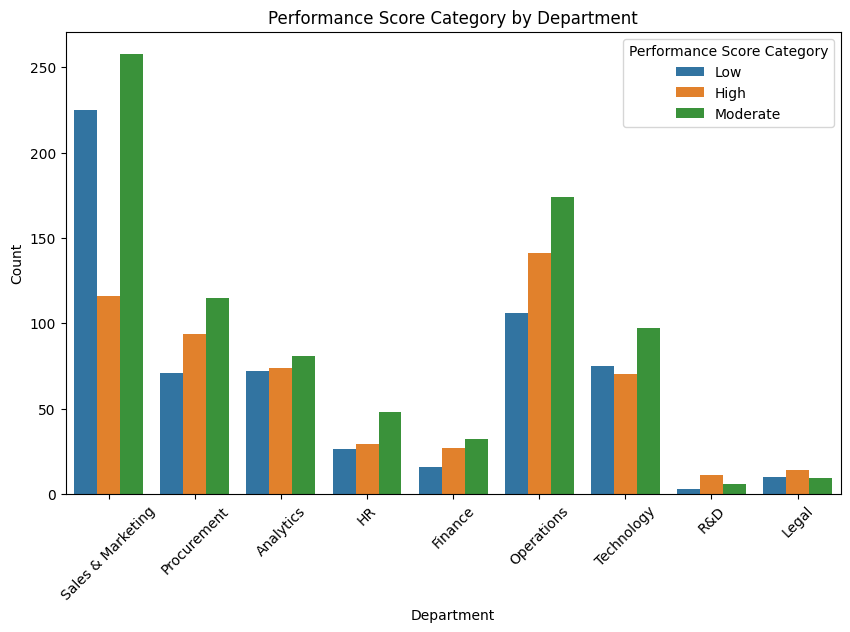

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Performance Score Category', data=df_clean)
plt.title('Performance Score Category by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

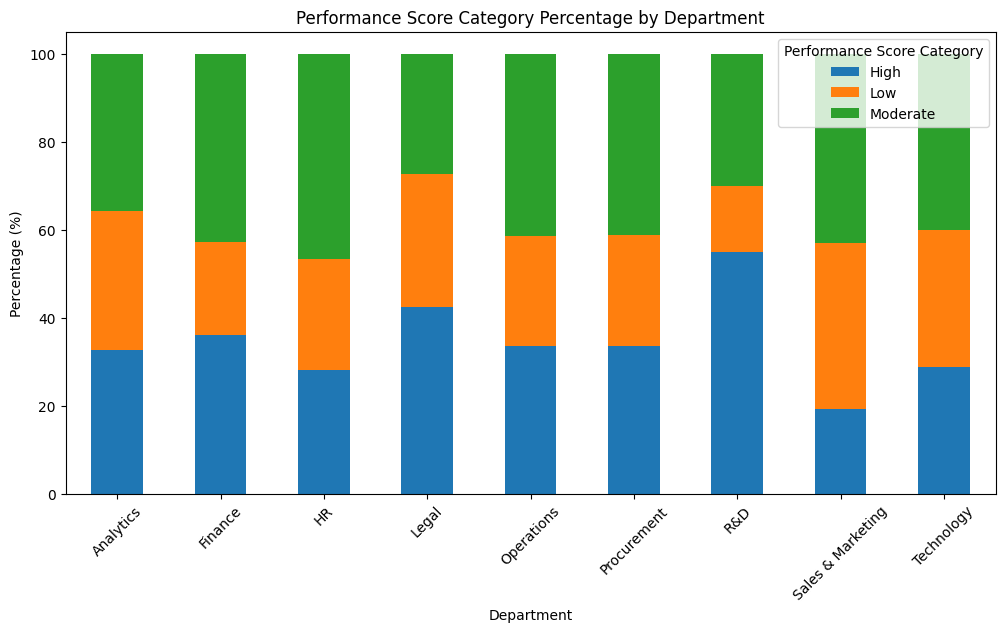

In [ ]:
# Calculate the percentage of each performance score category within each department
department_performance_counts = df_clean.groupby(['Department', 'Performance Score Category'])['Employee ID'].count().unstack().fillna(0)
department_performance_percentages = department_performance_counts.div(department_performance_counts.sum(axis=1), axis=0) * 100

# Create the plot
department_performance_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Performance Score Category Percentage by Department')
plt.xlabel('Department')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Performance Score Category')
plt.show()

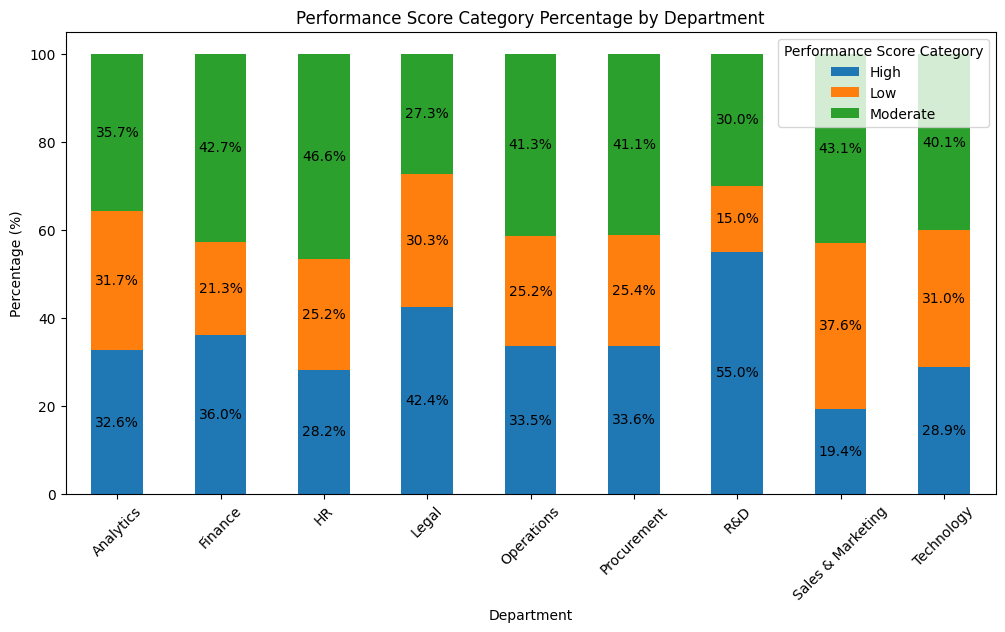

In [ ]:
# Calculate the percentage of each performance score category within each department
department_performance_counts = df_clean.groupby(['Department', 'Performance Score Category'])['Employee ID'].count().unstack().fillna(0)
department_performance_percentages = department_performance_counts.div(department_performance_counts.sum(axis=1), axis=0) * 100

# Create the plot
ax = department_performance_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Performance Score Category Percentage by Department')
plt.xlabel('Department')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Performance Score Category')

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

plt.show()

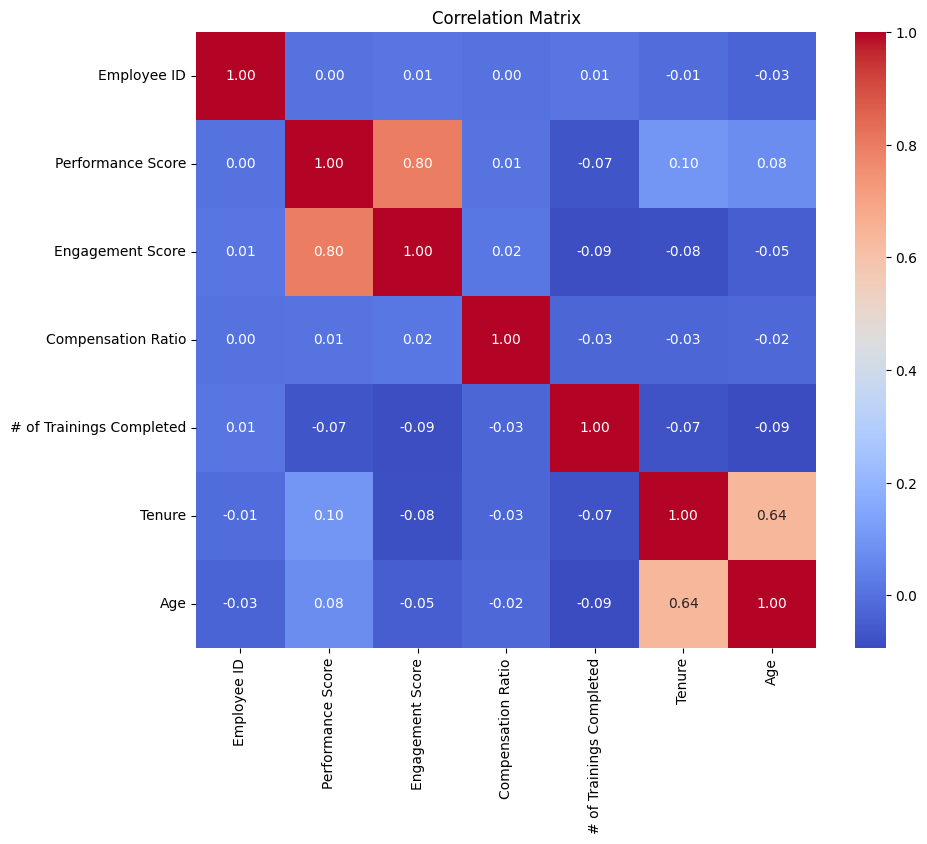

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_clean.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

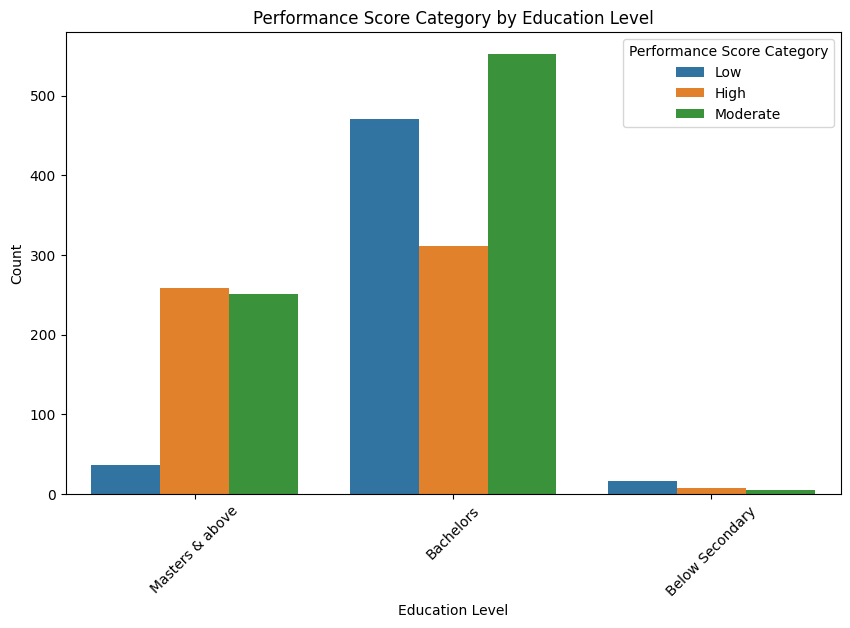

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='Education Level', hue='Performance Score Category', data=df_clean)
plt.title('Performance Score Category by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

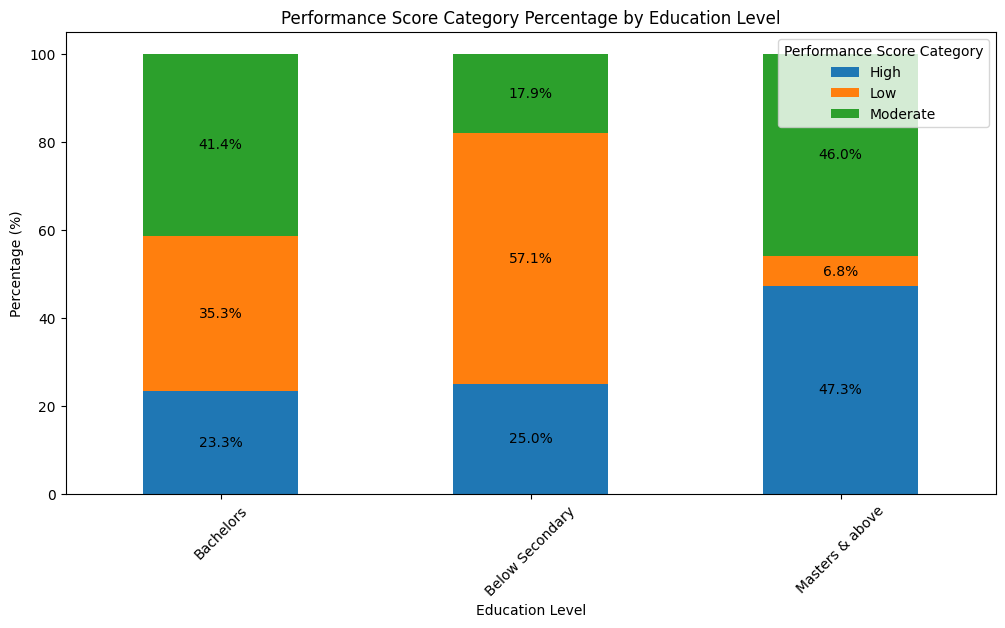

In [ ]:
# Calculate the percentage of each performance score category within each education level
education_performance_counts = df_clean.groupby(['Education Level', 'Performance Score Category'])['Employee ID'].count().unstack().fillna(0)
education_performance_percentages = education_performance_counts.div(education_performance_counts.sum(axis=1), axis=0) * 100

# Create the plot
ax = education_performance_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Performance Score Category Percentage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Performance Score Category')

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

plt.show()

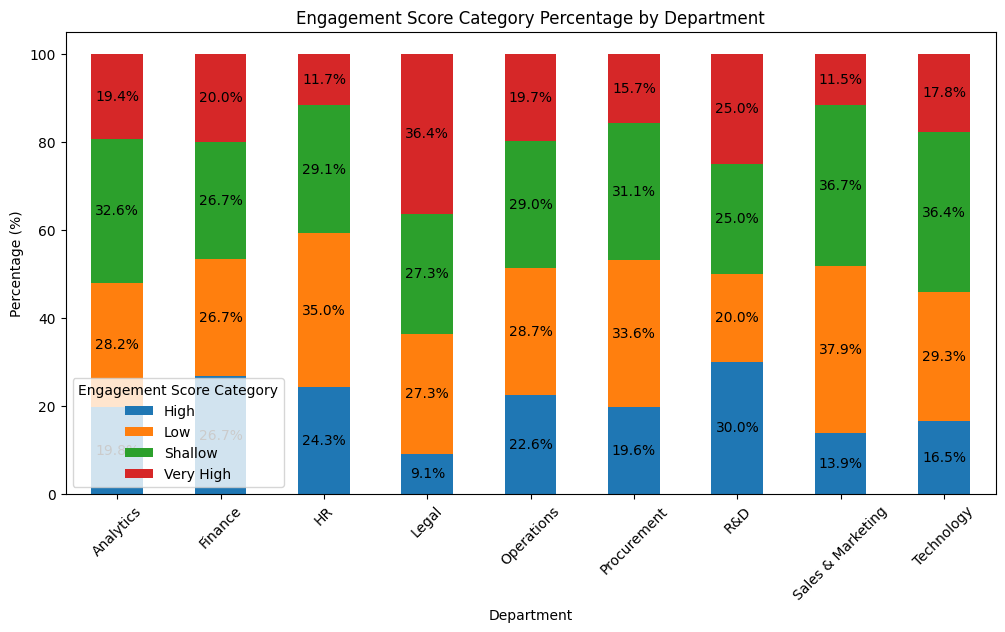

In [ ]:
# Calculate the percentage of each engagement score category within each department
department_engagement_counts = df_clean.groupby(['Department', 'Engagement Score Category'])['Employee ID'].count().unstack().fillna(0)
department_engagement_percentages = department_engagement_counts.div(department_engagement_counts.sum(axis=1), axis=0) * 100

# Create the plot
ax = department_engagement_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Engagement Score Category Percentage by Department')
plt.xlabel('Department')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Engagement Score Category')

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

plt.show()

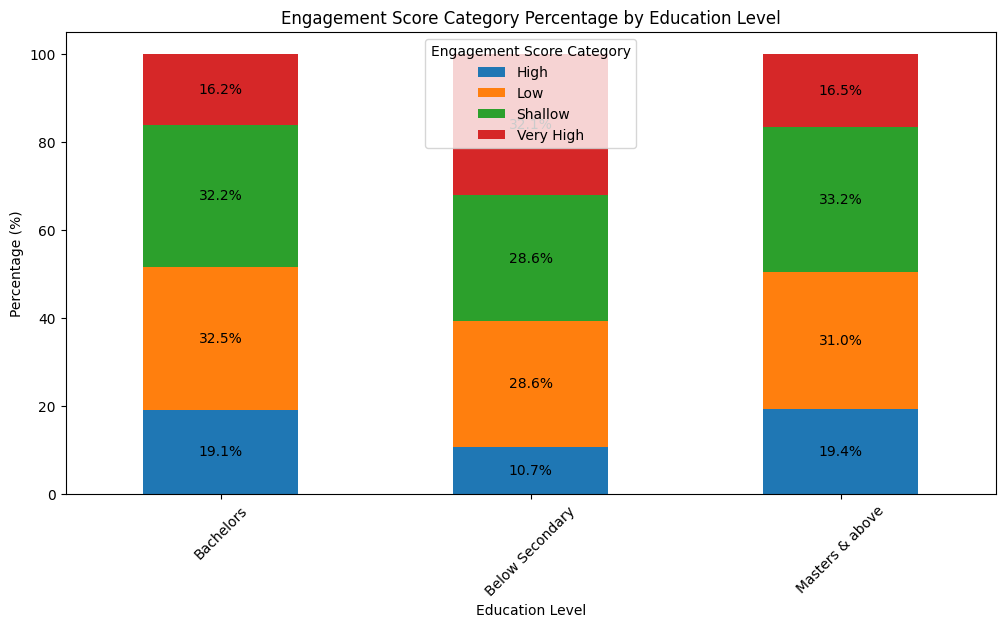

In [ ]:
# Calculate the percentage of each engagement score category within each education level
education_engagement_counts = df_clean.groupby(['Education Level', 'Engagement Score Category'])['Employee ID'].count().unstack().fillna(0)
education_engagement_percentages = education_engagement_counts.div(education_engagement_counts.sum(axis=1), axis=0) * 100

# Create the plot
ax = education_engagement_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Engagement Score Category Percentage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Engagement Score Category')

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

plt.show()